<a href="https://colab.research.google.com/github/DebarghaSamanta/CNN-practice/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 76% 124M/163M [00:00<00:00, 1.29GB/s]
100% 163M/163M [00:00<00:00, 1.12GB/s]


In [ ]:
import zipfile
zipfileref = zipfile.ZipFile('/content/face-mask-dataset.zip', 'r')
zipfileref.extractall()
zipfileref.close()

In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = '/content/data/with_mask'


In [ ]:
without_mask_files = '/content/data/without_mask'


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
with_mask_labels = np.ones(len(with_mask_images))

without_mask_labels = np.zeros(len(without_mask_images))

In [ ]:
len(with_mask_labels)

3725

In [ ]:
def image_preprocessing(folder_path):
  images = []
  for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        img = cv2.imread(filepath)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
  return images
with_mask_images = image_preprocessing(with_mask_files)
without_mask_images = image_preprocessing(without_mask_files)


In [ ]:
X = np.array(with_mask_images+without_mask_images)
y = np.concatenate((with_mask_labels,without_mask_labels),axis =0)

In [ ]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
X_train.shape
X_test.shape
#Y_train.shape
Y_test.shape

(1511,)

In [ ]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True
)

In [ ]:
history = model.fit(X_train_scaled, Y_train,
    validation_data=(X_test_scaled, Y_test),
    epochs=10)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.7703 - loss: 9.4433 - val_accuracy: 0.5096 - val_loss: 7.7576
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8373 - loss: 5.0483 - val_accuracy: 0.6724 - val_loss: 2.9578
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9012 - loss: 2.3773 - val_accuracy: 0.9007 - val_loss: 1.7487
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9068 - loss: 1.6340 - val_accuracy: 0.9040 - val_loss: 1.4819
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9151 - loss: 1.4139 - val_accuracy: 0.9219 - val_loss: 1.2559
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9262 - loss: 1.2266 - val_accuracy: 0.9471 - val_loss: 1.0201
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9369 - loss: 0.9480 - val_accuracy: 0.9259 - val_loss: 0.9476
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9392 - loss: 0.8239 - val_acc

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = (model.predict(X_test_scaled)>0.7).astype(int)
print(confusion_matrix(Y_test,y_pred))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
[[718  50]
 [ 23 720]]


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f'Test Accuracy: {accuracy:.4f}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9442 - loss: 0.6719
Test Accuracy: 0.9378


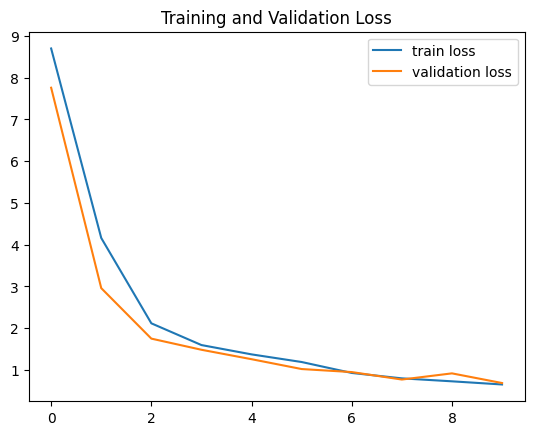

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

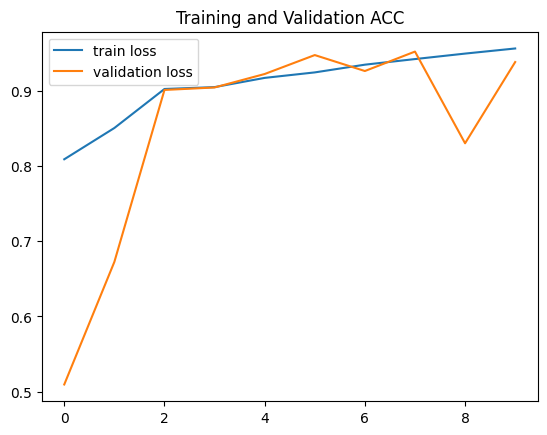

In [ ]:
plt.plot(history.history['accuracy'], label='train loss')
plt.plot(history.history['val_accuracy'], label='validation loss')
plt.title('Training and Validation ACC')
plt.legend()
plt.show()

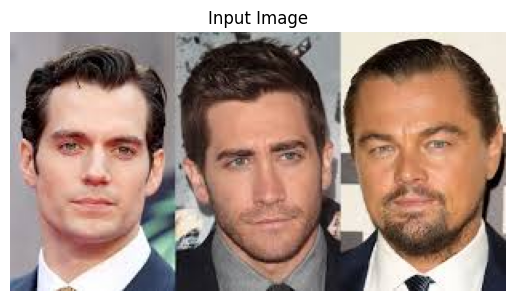

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction Probability: [[0.00014563]]
Predicted Label: 0
The person in the image is not wearing a mask


In [ ]:
input_image_path = '/content/data/without_mask/without_mask_998.jpg'
input_image = cv2.imread(input_image_path)
if input_image is None:
    print("Error: Could not load the image. Please check the file path.")
else:
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Input Image')
    plt.show()
    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = (input_prediction > 0.7).astype(int)[0][0]
    print('Prediction Probability:', input_prediction)
    print('Predicted Label:', input_pred_label)
    print('The person in the image is', 'wearing a mask' if input_pred_label == 1 else 'not wearing a mask')

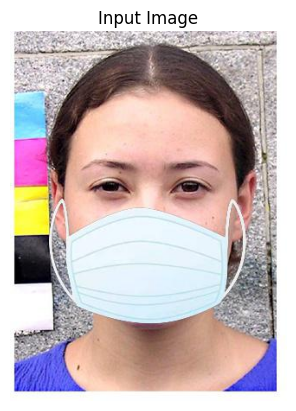

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction Probability: [[0.998478]]
Predicted Label: 1
The person in the image is wearing a mask


In [ ]:
input_image_path = '/content/data/with_mask/with_mask_997.jpg'
input_image = cv2.imread(input_image_path)
if input_image is None:
    print("Error: Could not load the image. Please check the file path.")
else:
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Input Image')
    plt.show()
    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = (input_prediction > 0.7).astype(int)[0][0]
    print('Prediction Probability:', input_prediction)
    print('Predicted Label:', input_pred_label)
    print('The person in the image is', 'wearing a mask' if input_pred_label == 1 else 'not wearing a mask')